In [2]:
import pandas as pd
import numpy as np
import sidetable
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('datos/coches_EDA.csv', index_col=0)
df.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,four,111.0,5000.0,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,four,111.0,5000.0,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,six,154.0,5000.0,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,four,102.0,5500.0,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,five,115.0,5500.0,18,22,17450


In [4]:
numericas=df.select_dtypes(include='number')

>En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

>- Pregunta teórica: ¿Qué diferencia existe entre la covarianza y la correlación?


La **covarianza** indica el signo de la relación entre dos variables. Si es positivo indica que si una variable aumenta, la otra también. Si es negativo, indica que si una variable aumenta, la otra disminuye. 

La **correlación** indica la intensidad en la relación entre dos variables. Los valores con los que se va a medir este estadístico se encuentran entre -1 y 1, teneindo en cuenta el signo de la covarianza entre ambas. Cuando más se acerque el valor a -1 y a 1 ¡, significará que la intesidad de relación es mayor. Si el valor resultado es 0, no existe relación entre las variables.

>- Calculad la covarianza y la correlación de nuestro dataset. No nos vale solo con que la calculéis, debéis hacer una interpretación de los resultados obtenidos. Calculad solo la correlación de Pearson.


In [5]:
numericas.cov()

,wheel-base,length,width,height,curb-weight,horsepower,peak-rpm,city-mpg,highway-mpg,price
wheel-base,37.143205,65.902335,10.485481,8.816916,2.467923e+03,84.504212,-1027.473031,-18.561396,-22.640232,2.852560e+04
length,65.902335,152.135700,22.303340,14.893265,5.622218e+03,265.953623,-1652.353579,-52.833323,-58.747485,6.797407e+04
width,10.485481,22.303340,4.439089,1.592089,9.444958e+02,48.155756,-241.048963,-8.601089,-9.784213,1.262449e+04
height,8.816916,14.893265,1.592089,5.976897,3.918814e+02,-7.744121,-359.233782,-0.832126,-1.788597,2.703317e+03
curb-weight,2467.922982,5622.217590,944.495828,391.881425,2.675338e+05,14608.254618,-68070.612285,-2493.612925,-2802.656938,3.436812e+06
horsepower,84.504212,265.953623,48.155756,-7.744121,1.460825e+04,1390.501946,1925.794296,-196.482538,-204.197626,2.400362e+05
peak-rpm,-1027.473031,-1652.353579,-241.048963,-359.233782,-6.807061e+04,1925.794296,227914.388454,-362.905768,-197.679917,-3.737326e+05
city-mpg,-18.561396,-52.833323,-8.601089,-0.832126,-2.493613e+03,-196.482538,-362.905768,41.241515,42.513669,-3.516027e+04
highway-mpg,-22.640232,-58.747485,-9.784213,-1.788597,-2.802657e+03,-204.197626,-197.679917,42.513669,46.375277,-3.824169e+04
price,28525.601995,67974.066982,12624.487055,2703.316728,3.436812e+06,240036.195606,-373732.636323,-35160.266539,-38241.691936,6.328075e+07


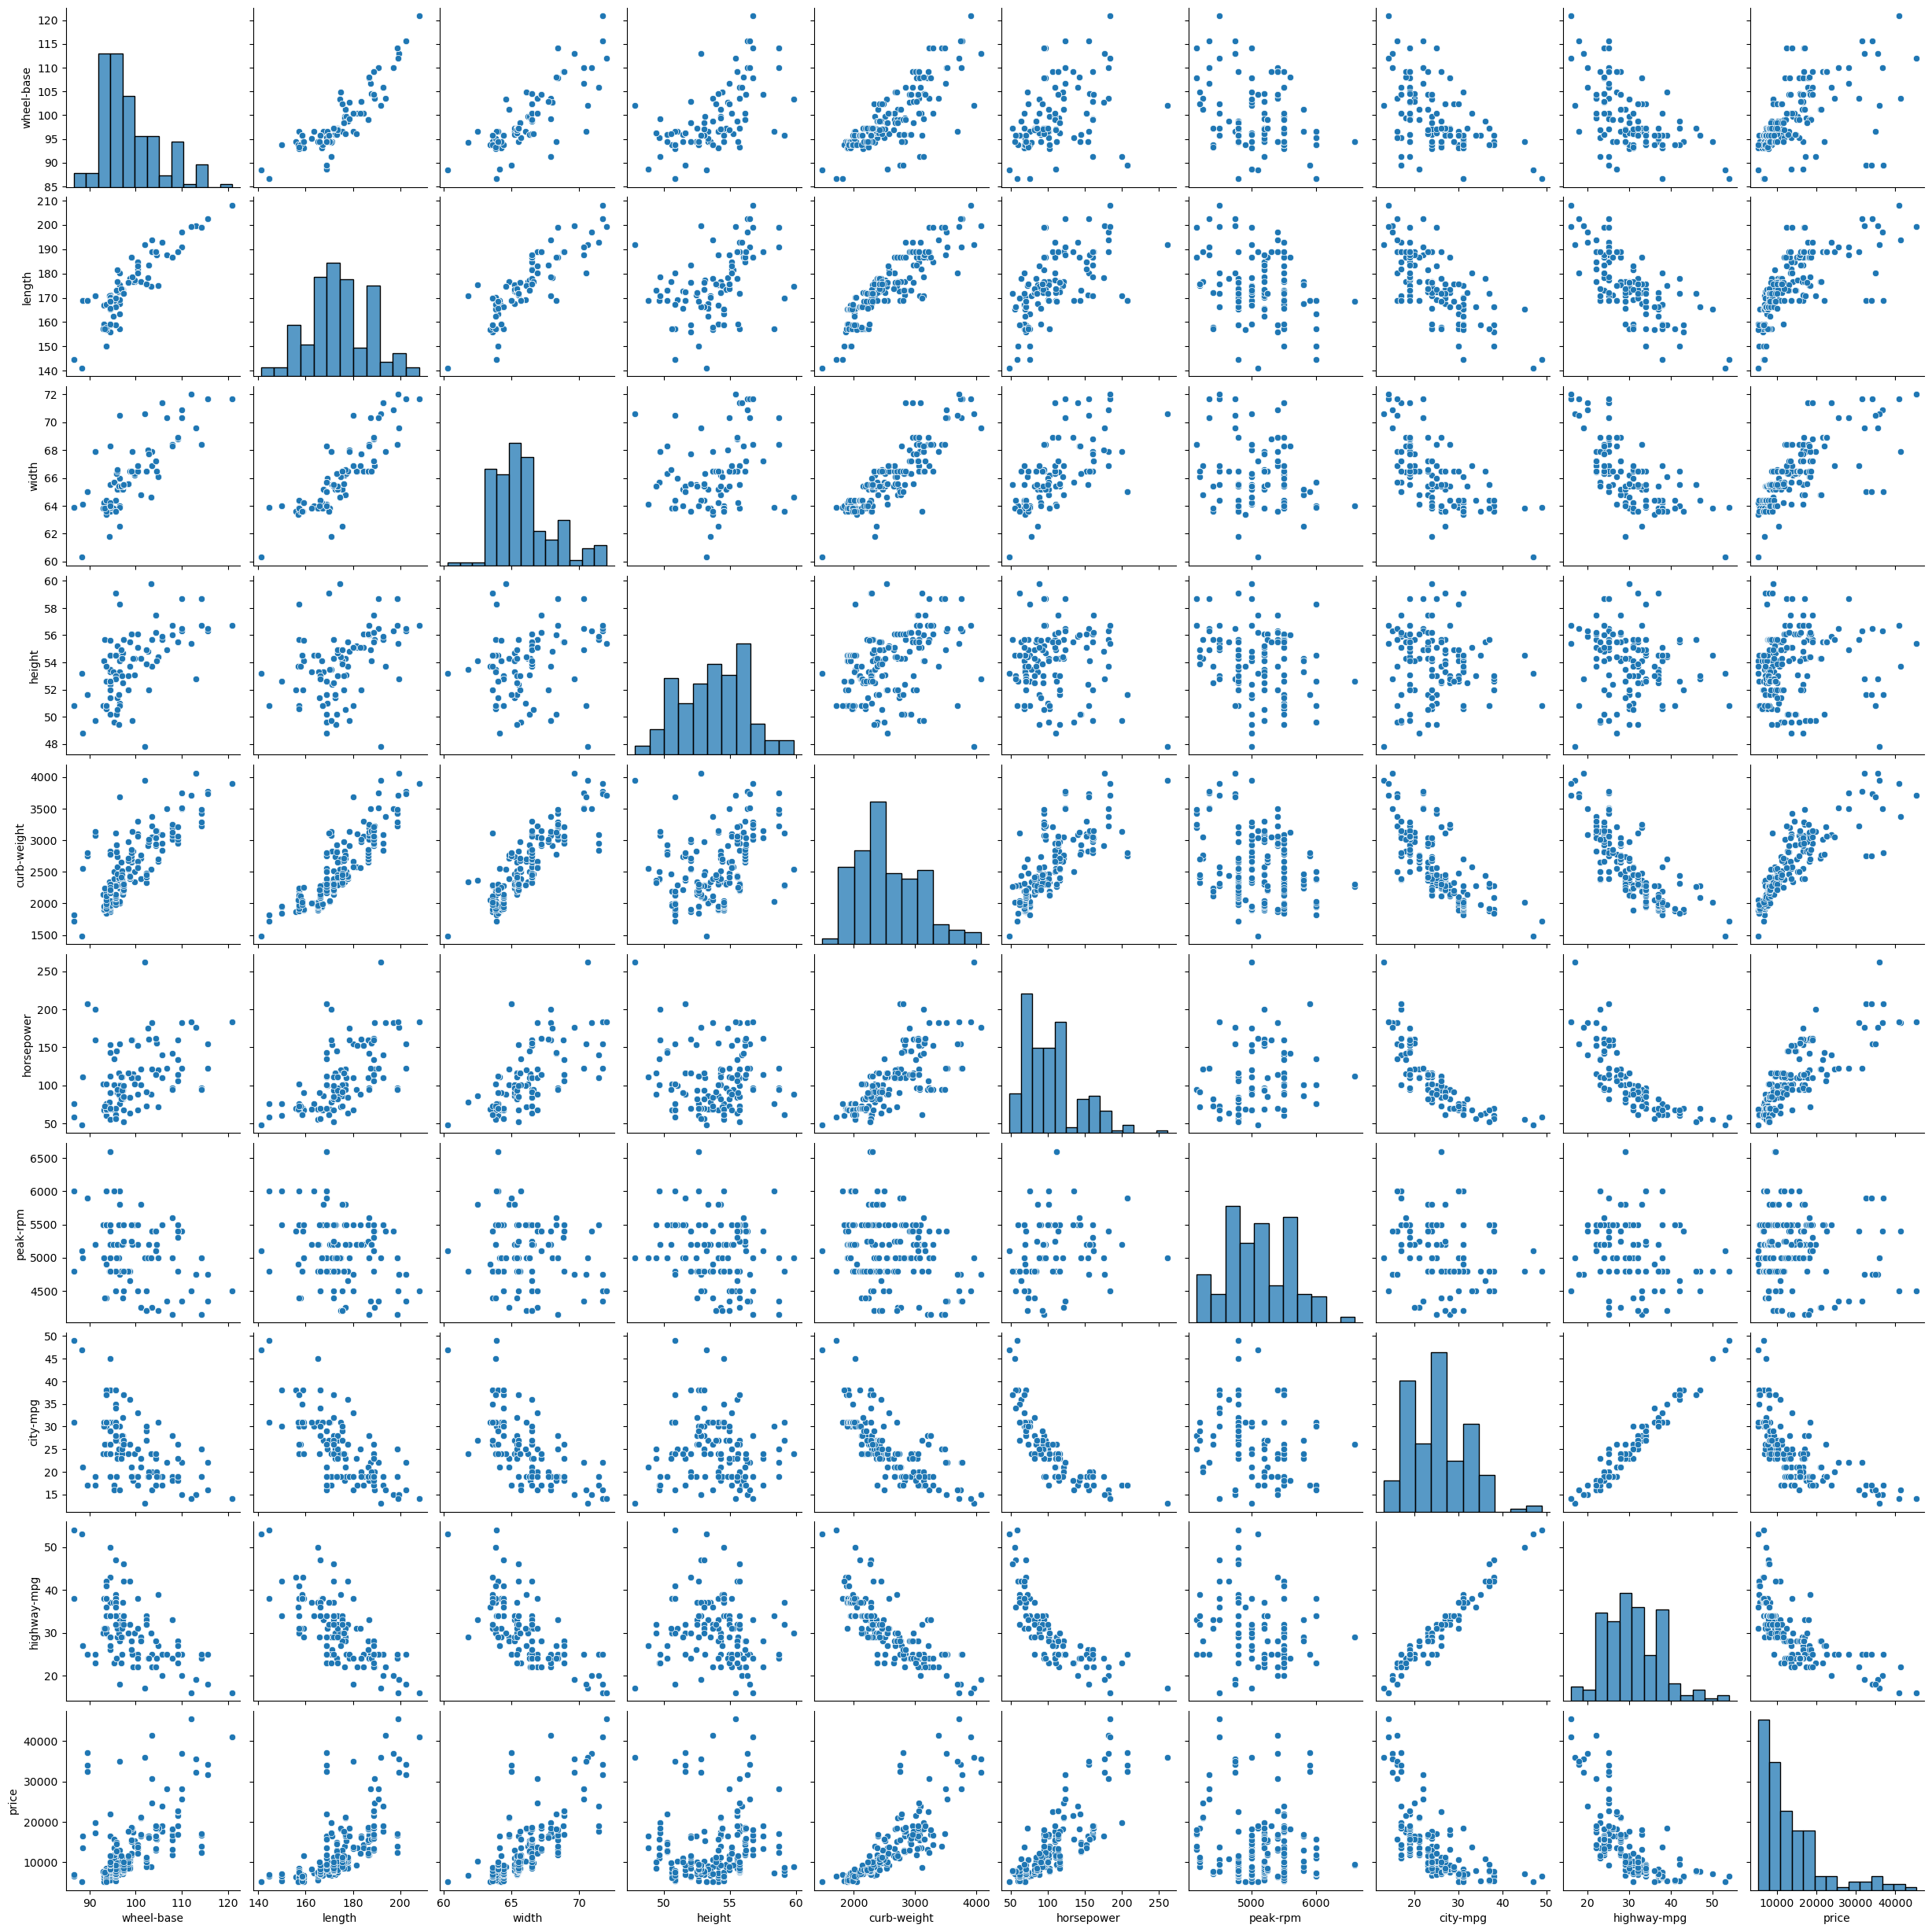

In [6]:
#visualmente
sns.pairplot(df)

Teniendo en cuenta los rsultados del anterior dataframe, interpretamos que tenemos ambos casos de covarianza entre las variables de nuestro dataset, tanto positiva como negativa. Aún así, podemos observar que hay un mayor número de covarianzas positivas que negativas. Con la correlación podremos comprobar si estas relaciones entre las variables son realmente verdad o si la intensidad es demasiado baja o nula. 

In [7]:
numericas.corr()

,wheel-base,length,width,height,curb-weight,horsepower,peak-rpm,city-mpg,highway-mpg,price
wheel-base,1.000000,0.876689,0.816586,0.591751,0.782893,0.371837,-0.353138,-0.474246,-0.545504,0.588382
length,0.876689,1.000000,0.858237,0.493897,0.881257,0.578235,-0.280609,-0.666999,-0.699408,0.692774
width,0.816586,0.858237,1.000000,0.309088,0.866690,0.612937,-0.239647,-0.635681,-0.681924,0.753236
height,0.591751,0.493897,0.309088,1.000000,0.309904,-0.084947,-0.307789,-0.053001,-0.107431,0.139003
curb-weight,0.782893,0.881257,0.866690,0.309904,1.000000,0.757396,-0.275667,-0.750710,-0.795678,0.835277
horsepower,0.371837,0.578235,0.612937,-0.084947,0.757396,1.000000,0.108178,-0.820485,-0.804121,0.809199
peak-rpm,-0.353138,-0.280609,-0.239647,-0.307789,-0.275667,0.108178,1.000000,-0.118370,-0.060804,-0.098410
city-mpg,-0.474246,-0.666999,-0.635681,-0.053001,-0.750710,-0.820485,-0.118370,1.000000,0.972116,-0.688254
highway-mpg,-0.545504,-0.699408,-0.681924,-0.107431,-0.795678,-0.804121,-0.060804,0.972116,1.000000,-0.705924
price,0.588382,0.692774,0.753236,0.139003,0.835277,0.809199,-0.098410,-0.688254,-0.705924,1.000000


En la tabla anterior podemos ver qué intensidad de relación hay en cada una de las variables, aunque es más sencillo interpretar los resultados con el heatmap en el ejercicio de abajo.

>- Con los resultados de la correlación del ejercicio anterior, cread un heatmap.


In [8]:
sns.heatmap(numericas.corr(), annot=True)

<AxesSubplot:>

In [9]:
#mejoramos la visualizacion con una mascara ya que se reflejan los mismos datos en la parte superior de la diagonal
mask= np.triu(np.ones_like(df.corr(), dtype= np.bool_))
sns.heatmap(df.corr(), mask= mask, annot= True) #incorporamos la mascara

<AxesSubplot:>

Aunque en la tabla de la covarianza hemos observado que había tanto signos positivos como negativos, no todas las variables se relacionan entre sí, los valores cerca del 0,3/-0,3 hasta el 0, pueden interpretarse como que la correlación entre esas variables es prácticamente nula. 

Aun así, sí se observan variables muy correlacionadas, las que vemos por encima del 0,7/-0,7.

La varibale respuesta, que es la que más nos interesa, tiene correlación positiva con las variables:

- wheel-base
- lenght
- widht
- curb-weight
- horsepower

Tiene correlación negativa con las variables:

- city-mpg
- highway-mpg

>- Guardad la gráfica del heatmap.

In [10]:
plt.savefig('datos/heatmap_regresion-lineal-III.jpg');